### Tarea: Graficar los datos de salida del código anterior

In [1]:
from random import expovariate
from matplotlib.pyplot import *
from random import seed
from math import inf as Infinity
from statistics import mean

Retraso promedio =  1.4367


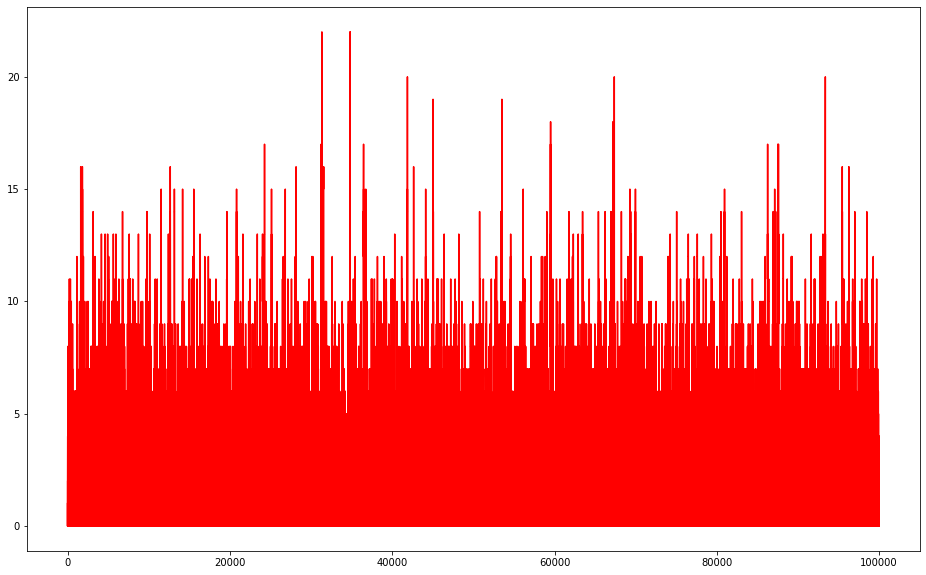

In [5]:
# Parametros

lamda = 1.3                         # Razón de arrivos (1/Lambda)  Ojo
mu = 2.0                            # Razón de salida (1/Mu)       Ojo


#Num_Pkts = 100                   # Numero de paquetes a simular
T = 100
count = 0                           # Contador de paquetes simulados
t = 0
N = 0                               # Variable de estado: numero de paquetes en el sistema

tll = expovariate(lamda)            # Tiempo de llegada
ts = Infinity                       # Tiempo de salida

# Variables de salida
tll_Data = []                       # Lista de tiempos de llegada
ts_Data = []                        # Lista de tiempos de salida
r_Data = []                         # Lista de retrasos individuales
X = []
Num = []
#while count < Num_Pkts:
while t < T:
    if tll < ts:                           # Evento de llegada
        t = tll
        X.append(t)
        tll_Data.append(t)
        N = N + 1.0
        Num.append(N)
        tll = t + expovariate(lamda) 
        if N == 1:
            ts = t + expovariate(mu)
    else:                                         # Evento de salida
        t = ts 
        ts_Data.append(t)
        X.append(t)
        N = N - 1.0
        Num.append(N)
        count = count + 1                         # Paquetes simulados
        if N > 0:
            ts = t + expovariate(mu)
        else:
            ts = Infinity
            
# Estimación del retraso promedio:
#for i in range(Num_Pkts):
for i in range(T):
    d = ts_Data[i] - tll_Data[i]
    r_Data.append(d)


print( "Retraso promedio = ", round( mean(r_Data), 4) )
fig = figure(1, figsize=(16, 10))
step(X,Num, color='red')


### Estamación del número promedio de clientes en el sistema

La variable de estado $N(t)$ representa el número de clientes/paquetes en el sistema al tiempo $t$, también designado con $L$ (verificar). Esta cantidad se puede calcular directamente como:

$$\mathbb{E}[N(t)] = \frac{1}{T}\int_0^T N(t) dt $$

donde $T$ es el tiempo total de la simulación. Esta integral se puede interpretar geometricamente como el área de los escalones en la gráfica $N(t)$ vs $t$.

In [4]:
# Parametros

lamda = 1.3                         # Razón de arrivos (1/Lambda)  Ojo
mu = 2.0                            # Razón de salida (1/Mu)       Ojo


Num_Pkts = 100000                   # Numero de paquetes a simular
#T = 100000
count = 0                           # Contador de paquetes simulados
t = 0
N = 0                               # Variable de estado: numero de paquetes en el sistema

tll = expovariate(lamda)            # Tiempo de llegada
ts = Infinity                       # Tiempo de salida

t_evento_anterior = 0.0             # tiempo del último evento ****************Nuevas líneas de código***********


# Variables de salida
tll_Data = []                       # Lista de tiempos de llegada
ts_Data = []                        # Lista de tiempos de salida
r_Data = []                         # Lista de retrasos individuales
Area = []                           # Area de escalón ***********************************************************


while count < Num_Pkts:
#while t < T:
    if tll < ts:                           # Evento de llegada
        t = tll
        tll_Data.append(t)
        
        # Area del escalón ***********************************************************************************
        Area.append((t - t_evento_anterior)*N)
        t_evento_anterior = t
        
        
        N = N + 1.0
        tll = t + expovariate(lamda) 
        if N == 1:
            ts = t + expovariate(mu)
    else:                                         # Evento de salida
        t = ts
        ts_Data.append(t)
        
        # Area del escalón ***********************************************************************************
        Area.append((t - t_evento_anterior)*N)
        t_evento_anterior = t
        
        
        N = N - 1.0
        count = count + 1                         # Paquetes simulados
        if N > 0:
            ts = t + expovariate(mu)
        else:
            ts = Infinity
            
# Estimación del retraso promedio:

for i in range(Num_Pkts):
#for i in range(T):
    d = ts_Data[i] - tll_Data[i]
    r_Data.append(d)

print( "Retraso promedio = W = ", round( mean(r_Data), 4) )
print( "E[ N(t)] = L = ", round(sum(Area)/t, 4))

Retraso promedio = W =  1.4417
E[ N(t)] = L =  1.8728


### Ejemplo:

Lavado Automata para automóviles funciona sólo con un lugar. Los autos llegan siguiendo
una distribución de Poisson, con 4 autos por hora, que pueden esperar en el estacionamiento de
la instalación, si el lugar de lavado está ocupado. El tiempo para lavar y limpiar un automóvil
es exponencial, con 10 minutos de promedio. Los automóviles que no se pueden estacionar en
la instalación pueden esperar en el arrollo junto al lavado. Eso quiere decir que para todo fin
práctico no hay límite del tamaño del sistema. El gerente de la instalación desea determinar el
tamaño del estacionamiento.

Para resolver este problema, hay que determinar $L_q$, pero de momento estimemos $L$ y $W$ usando la simulación.

### Ejercicios:

Calcular $L_q$ para el ejemplo anterior, usando las fórmulas de arriba.


En una estación con un solo servidor llegan en promedio 45 clientes por hora. Se tiene capacidad para atender 
en promedio a 60 clientes por hora. Se sabe que los clientes esperan en promedio 3 minutos en la cola.
Se solicita determinar: 
* Tiempo promedio que un cliente pasa en el sistema. 
* Número promedio de clientes en la cola. 
* Número promedio de clientes en el Sistema en un momento dado.

Use la simulación para responder y luego verifique los resultados usando las fórmulas de arriba.

### Tarea:

Convierta el código anterior en una función y usela para resolver los ejercicios propuestos (más tarde por classroom)